In [1]:
#load library
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk as nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from textblob import TextBlob

In [2]:
#membaca file csv
DataCSV = pd.read_csv(open('DATA_TES2.csv', newline='', encoding='utf-8'), delimiter=';')

In [3]:
DataCSV

,no,username,name,tweet,language
0,1,suryakepricom,Suryakepri.com,https://t.co/jAHpJnlA7g #suryakepri #batam #n...,in
1,2,suryakepricom,Suryakepri.com,https://t.co/zdTQ69TIcg #suryakepri #batam #n...,in
2,3,suryakepricom,Suryakepri.com,https://t.co/S1VPH03EL0 #suryakepri #batam #n...,in
3,4,suryakepricom,Suryakepri.com,https://t.co/wIZLPVyQCU #suryakepri #batam #n...,in
4,5,suluhco,suluh.co,#Pilkada2020 #PilWaKo #KotaMetro #Lampung @Agu...,in
...,...,...,...,...,...
532,533,mrapatdotid1,mrapatdotid,"KPU terangkan, berapapun pasangan calon, perhi...",in
533,534,kasubabahrain,Sahabat Bahrain Kasuba,Pelabuhan Babang dan Peran Bahrain Kasuba Wuju...,in
534,535,jtv_rek,JTV,@kpugresik punya gawe niih.. Ikuti acaranya da...,in
535,536,kpu_kota_medan,KPU Kota Medan,3 Hari menuju Pendaftaran Bakal Pasangan Calon...,in


In [17]:
#translit bahasa dengan library translator
import translators as ts
translit=[]
bahasa=[]
for i in DataCSV['tweet']:
    translit.append(ts.google(i, from_language='auto', to_language='en'))
    bahasa.append("en")
    #print(translit)
    
DataCSV['translit'] = translit
DataCSV['bahasa']= bahasa

In [18]:
DataCSV

,no,username,name,tweet,language,translit,Polarity,Label,bahasa
0,1,suryakepricom,Suryakepri.com,https://t.co/jAHpJnlA7g #suryakepri #batam #n...,in,https://t.co/jahpjnla7g #suryakepri #Batam #Ne...,0.0,NEU,en
1,2,suryakepricom,Suryakepri.com,https://t.co/zdTQ69TIcg #suryakepri #batam #n...,in,https://t.co/ZDTQ69TIGG #Suryakepri #Batam #Ne...,0.0,NEU,en
2,3,suryakepricom,Suryakepri.com,https://t.co/S1VPH03EL0 #suryakepri #batam #n...,in,https://t.co/S1VPH03EL0 #Suryakepri #Batam #Ne...,0.0,NEU,en
3,4,suryakepricom,Suryakepri.com,https://t.co/wIZLPVyQCU #suryakepri #batam #n...,in,https://t.co/wizlpvyqcu #suryakepri #Batam #Ne...,0.0,NEU,en
4,5,suluhco,suluh.co,#Pilkada2020 #PilWaKo #KotaMetro #Lampung @Agu...,in,# Pilkada2020 #pitwako #katametro @Lampung @am...,0.0,NEU,en
...,...,...,...,...,...,...,...,...,...
532,533,mrapatdotid1,mrapatdotid,"KPU terangkan, berapapun pasangan calon, perhi...",in,"KPU explained, whatever the candidate pair, th...",0.0,NEU,en
533,534,kasubabahrain,Sahabat Bahrain Kasuba,Pelabuhan Babang dan Peran Bahrain Kasuba Wuju...,in,Babang Port and the Role of Bahrain Kasuba Rea...,0.0,NEU,en
534,535,jtv_rek,JTV,@kpugresik punya gawe niih.. Ikuti acaranya da...,in,@kpugresik has a gawe ... follow the program f...,0.0,NEU,en
535,536,kpu_kota_medan,KPU Kota Medan,3 Hari menuju Pendaftaran Bakal Pasangan Calon...,in,3 days to registration for the candidate pair ...,0.0,NEU,en


In [19]:
DataCSV.drop_duplicates(subset ="translit", keep = "first", inplace = True)
DataCSV['translit'] = DataCSV['translit'].astype('str') 
def get_polarity(text): return TextBlob(text).sentiment.polarity
DataCSV['Polarity'] = DataCSV['tweet'].apply(get_polarity)

DataCSV['Label']=''
DataCSV.loc[DataCSV.Polarity>0,'Label']='POS'
DataCSV.loc[DataCSV.Polarity==0,'Label']='NEU'
DataCSV.loc[DataCSV.Polarity<0,'Label']='NEG'

In [20]:
DataCSV

,no,username,name,tweet,language,translit,Polarity,Label,bahasa
0,1,suryakepricom,Suryakepri.com,https://t.co/jAHpJnlA7g #suryakepri #batam #n...,in,https://t.co/jahpjnla7g #suryakepri #Batam #Ne...,0.0,NEU,en
1,2,suryakepricom,Suryakepri.com,https://t.co/zdTQ69TIcg #suryakepri #batam #n...,in,https://t.co/ZDTQ69TIGG #Suryakepri #Batam #Ne...,0.0,NEU,en
2,3,suryakepricom,Suryakepri.com,https://t.co/S1VPH03EL0 #suryakepri #batam #n...,in,https://t.co/S1VPH03EL0 #Suryakepri #Batam #Ne...,0.0,NEU,en
3,4,suryakepricom,Suryakepri.com,https://t.co/wIZLPVyQCU #suryakepri #batam #n...,in,https://t.co/wizlpvyqcu #suryakepri #Batam #Ne...,0.0,NEU,en
4,5,suluhco,suluh.co,#Pilkada2020 #PilWaKo #KotaMetro #Lampung @Agu...,in,# Pilkada2020 #pitwako #katametro @Lampung @am...,0.0,NEU,en
...,...,...,...,...,...,...,...,...,...
532,533,mrapatdotid1,mrapatdotid,"KPU terangkan, berapapun pasangan calon, perhi...",in,"KPU explained, whatever the candidate pair, th...",0.0,NEU,en
533,534,kasubabahrain,Sahabat Bahrain Kasuba,Pelabuhan Babang dan Peran Bahrain Kasuba Wuju...,in,Babang Port and the Role of Bahrain Kasuba Rea...,0.0,NEU,en
534,535,jtv_rek,JTV,@kpugresik punya gawe niih.. Ikuti acaranya da...,in,@kpugresik has a gawe ... follow the program f...,0.0,NEU,en
535,536,kpu_kota_medan,KPU Kota Medan,3 Hari menuju Pendaftaran Bakal Pasangan Calon...,in,3 days to registration for the candidate pair ...,0.0,NEU,en


In [21]:
jumlahPOS= DataCSV[DataCSV['Label'] == 'POS']['Label'].count()
jumlahNEG= DataCSV[DataCSV['Label'] == 'NEG']['Label'].count()
jumlahNEU= DataCSV[DataCSV['Label'] == 'NEU']['Label'].count()

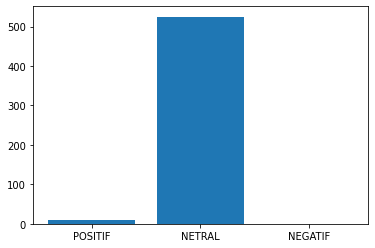

In [22]:
import matplotlib.pyplot as plt
x = np.array(["POSITIF", "NETRAL", "NEGATIF"])
y = np.array([jumlahPOS, jumlahNEU, jumlahNEG])

plt.bar(x,y)
plt.show()